### 2. Poisonous Mushrooms

Use KNN, Naive Bayes and SVM on the ‘Mushroom’ dataset to predict if a mushroom is edible:

- Clean and preprocess data using a one-hot-encoder for categorical variables.
- Run the three models on the data. Which model provides the best prediction?
- What else do you observe? Poisonous mushrooms have distinct characteristics and luckily people can identify them. 
- Is it possible to identify which features (or combinations of features) are stronger correlated with the poisonous character?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from typing import Dict, Tuple, Callable
from sklearn import svm
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [2]:
columns = ["edible", "cap-shape", "cap-surface", "cap-color", "bruises?",
            "odor", "gill-attachment", "gill-spacing", "gill-size", "gill-color",
            "stalk-shape", "stalk-root", "stalk-surface-above-ring",
            "stalk-surface-below-ring", "stalk-color-above-ring",
            "stalk-color-below-ring", "veil-type", "veil-color", "ring-number",
            "ring-type", "spore-print-color", "population", "habitat"
            ]

data = pd.read_csv('agaricus-lepiota.data.csv', names=columns, index_col=None)

In [3]:
data.head()

,edible,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#datap is processed data
datap = pd.get_dummies(data, prefix_sep="_",
                              columns=columns)

In [5]:
datap.head()

,edible_e,edible_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [6]:
#deleting non-edible (poisoness) column since data is directly correlated with edible data.
datap = datap.drop(columns=['edible_p'])

In [7]:
X = datap.loc[:, datap.columns != 'edible_e'].values
y =datap['edible_e'].values

In [8]:
# create training and testing data sets which we will use later after we select a model from k-1 cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(6499, 117) (6499,)
(1625, 117) (1625,)


# KNN Model

In [9]:
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": [3, 4,5,6,7,50]}
#use gridsearch to test all values for degrees
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [12]:
knn_gscv.scorer_

AttributeError: 'numpy.ndarray' object has no attribute 'score'

### KNN SCORE

In [13]:
knn_gscv.best_score_

1.0

In [14]:
# we can see that the high accuracy is likely because the test data is so evently distributed
pd.Series(y_test).value_counts()/len(y_test)

1    0.503385
0    0.496615
dtype: float64

# Naive Bayes Model

In [78]:
from sklearn.naive_bayes import BernoulliNB
#create new a BernoulliNB model
bnb = BernoulliNB()
#create a dictionary for parameters
param_grid = {"binarize": [None]}
#use gridsearch to test all values for degrees
bnb_gscv = GridSearchCV(bnb, param_grid, cv=5)
#fit model to data
bnb_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                                   fit_prior=True),
             iid='warn', n_jobs=None, param_grid={'binarize': [None]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

### Bayes Score

In [79]:
bnb_gscv.best_score_

0.9382981997230343

In [100]:
bnb_gscv.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                                   fit_prior=True),
             iid='warn', n_jobs=None, param_grid={'binarize': [None]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)>

### SVM Model

In [91]:
from sklearn.svm import LinearSVC
#create new a SVM model
svm = LinearSVC()
#create a dictionary for parameters
param_grid = {"penalty": ['l2'], "loss": ['squared_hinge'],"C": [0.01,0.1,1,10],"dual": [False]}
#use gridsearch to test all values for degrees
svm_gscv = GridSearchCV(svm, param_grid, cv=5)
#fit model to data
svm_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10], 'dual': [False],
                         'loss': ['squared_hinge'], 'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

### SVM Score with l2 loss

In [94]:
svm_gscv.best_score_

1.0

In [93]:
from sklearn.svm import LinearSVC
#create new a SVM model
svm2 = LinearSVC()
#create a dictionary for parameters
param_grid = {"penalty": ['l1'],"C": [0.01,0.1,1,10],"dual": [False]}
#use gridsearch to test all values for degrees
svm2_gscv = GridSearchCV(svm2, param_grid, cv=5)
#fit model to data
svm2_gscv.fit(X_train, y_train)

/Users/timothypillow/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/timothypillow/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/timothypillow/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/timothypillow/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/timothypillow/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10], 'dual': [False],
                         'penalty': ['l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

### SVM Score with l2 loss

In [95]:
svm2_gscv.best_score_

1.0

### Appling our Bayes, Bernoulli model on our Train Data Set and making Predicting on y_test

In [101]:
bnb = bnb_gscv.best_estimator_ 

bnb.fit(X_train, y_train)

y_pred = bnb.predict_proba(X_test)



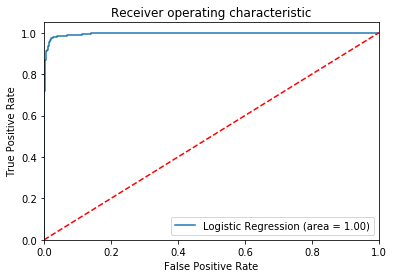

In [102]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
bnb_roc_auc = roc_auc_score(y_test, y_pred[:,1])
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % bnb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()